<a href="https://colab.research.google.com/github/mbassi237/projet-personnel/blob/analyse_donn%C3%A9es/TP1_Analyse_Factorielle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 : ANALYSE FACTORIELLE
Le but est de réaliser un TP en langage python qui réalise les taches suivantes
Etant donné une matrice X de taille I*K
Etant donné une valeur s appartenant à N S < I
déterminer les s plus grandes valeurs propres
Déterminer et afficher les vecteurs colonnes μ1, μ2, ….. , μs issues de l’ajustement du nuage des individus dans l’espace de variables
Déterminer et afficher les vecteurs colonnes v1, v2, ….. , vs issues de l’ajustement du nuage des variables dans l’espace des individus
Considérons les 2 plus grandes valeurs propres, dessiner dans un même plan le nuage des individus et celui des variables en considérant les projections par les vecteurs F1 et F2
Calculer et afficher la matrice de reconstruction en considérant les s plus grandes valeurs propres
Donner le taux de considération des informations par la matrice reconstruite
NB : la matrice X et la valeur s doivent être généré automatiquement par le programme et non figé manuellement

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Génération automatique de la matrice X et de la valeur s
np.random.seed(42)
I, K = 10, 5
X = np.random.rand(I, K)
s = np.random.randint(1, I)  # s appartient à N, s < I

In [3]:
X_centred = X - np.mean(X, axis=0)

# Calcul de la matrice de covariance
C = np.cov(X_centred, rowvar=False)

In [4]:
valeursPropres, vecteursPropres = np.linalg.eigh(C)
sorted_indices = np.argsort(valeursPropres)[::-1] # Indices tries par decroissantes
top_s_indices = sorted_indices[:s]
top_s_valeursPropres = valeursPropres[top_s_indices]
top_s_vecteursPropres = vecteursPropres[:, top_s_indices]

In [11]:
# Calcul des vecteurs propres (axes des individus)
mu_s = X_centred @ top_s_vecteursPropres

print(f"vecteurs propres de l'ajustement des variables dans l'espace des individus {mu_s}")

#Calcul des vecteurs propres (axes des variables)
v_s = top_s_vecteursPropres

print(f"vecteurs propres de l'ajustement des individus dans l'espace des variables {v_s}")

vecteurs propres de l'ajustement des variables dans l'espace des individus [[ 0.56141715  0.16712381]
 [ 0.01600634 -0.61358387]
 [ 0.88469781 -0.08312493]
 [ 0.17512929 -0.14441486]
 [-0.25376338  0.04229751]
 [-0.09108191  0.36621103]
 [-0.7391968  -0.24596106]
 [-0.44240949  0.26632862]
 [-0.09652537  0.01912396]
 [-0.01427363  0.2259998 ]]
vecteurs propres de l'ajustement des individus dans l'espace des variables [[-0.40532066  0.62591669]
 [ 0.55263846  0.26208335]
 [ 0.52743644 -0.29993546]
 [-0.32634704 -0.03539682]
 [-0.38159443 -0.66957181]]


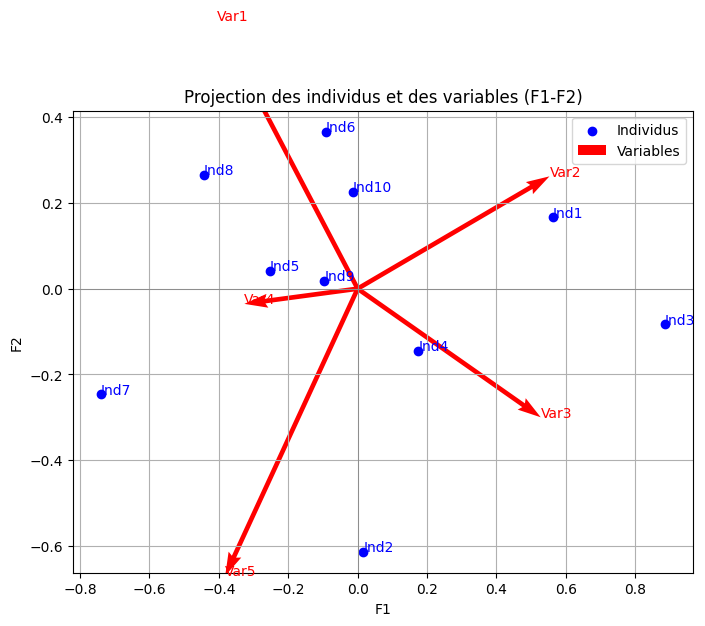

In [7]:
# Dessiner les projections par F1 et F2 (les deux premieres composantes)
if s >= 2:
  F1, F2 = mu_s[:, 0], mu_s[:, 1]
  plt.figure(figsize=(8,6))

  # Nuage des individus
  plt.scatter(F1, F2, color='blue', label='Individus')
  for i in range(len(F1)):
    plt.text(F1[i], F2[i], f"Ind{i+1}", color='blue', fontsize=10)

  # Nuage des variables
  V1, V2 = v_s[:, 0], v_s[:, 1]

  # Providing X and Y coordinates for each arrow
  X_arrows = np.zeros_like(V1) # X coordinates for arrows starting at 0
  Y_arrows = np.zeros_like(V2) # Y coordinates for arrows starting at 0

  plt.quiver(X_arrows, Y_arrows, V1, V2, angles='xy', scale_units='xy', scale=1, color='red', label="Variables")

  for i in range(len(V1)):
    plt.text(V1[i], V2[i], f"Var{i+1}", color='red', fontsize=10)

  plt.axhline(0, color='gray', linewidth=0.5)
  plt.axvline(0, color='gray', linewidth=0.5)
  plt.title("Projection des individus et des variables (F1-F2)")
  plt.xlabel("F1")
  plt.ylabel("F2")
  plt.legend()
  plt.grid()
  plt.show()


In [12]:
# Calcul de la matrice de reconstruction
matrice_reconstruction = mu_s @ v_s.T + np.mean(X, axis=0)

print("Matrice de reconstruction :")
print(matrice_reconstruction)

Matrice de reconstruction :
[[ 0.31025713  0.74447543  0.69387836  0.40006585  0.04277342]
 [ 0.04266543  0.23844996  0.64037074  0.60569362  0.773639  ]
 [ 0.02258994  0.85754673  0.93944683  0.30342218  0.08697082]
 [ 0.27183033  0.44934881  0.58357756  0.53715723  0.39877622]
 [ 0.56253578  0.26126042  0.30136227  0.67051606  0.43742194]
 [ 0.6993405   0.4360568   0.29001326  0.60595993  0.15846024]
 [ 0.57886613 -0.08255653  0.13178596  0.83913925  0.81567044]
 [ 0.77922276  0.21572215  0.13466857  0.72415017  0.35940333]
 [ 0.48429926  0.34208279  0.3912459   0.62002217  0.39293715]
 [ 0.58044796  0.44175698  0.37257906  0.58585681  0.22303211]]


In [13]:
# Calcul du taux de consideration des informations
total_variance = np.sum(valeursPropres)
considered_variance = np.sum(top_s_valeursPropres)
taux_information = (considered_variance / total_variance) * 100

print(f"Taux de consideration des informations : {taux_information}")

Taux de consideration des informations : 71.30776504365667


In [14]:
# Afficher les résultats
print(f"Matrice X originale :\n{X}")
print(f"Valeurs propres :\n{top_s_valeursPropres}")
print(f"Vecteurs propres associés (μ1, μ2, ..., μs) :\n{mu_s}")
print(f"Vecteurs propres associés (v1, v2, ..., vs) :\n{v_s}")
print(f"Matrice reconstruite :\n{matrice_reconstruction}")
print(f"Taux de considération des informations par la matrice reconstruite : {taux_information:.2f}%")

Matrice X originale :
[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]
 [0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203]
 [0.80839735 0.30461377 0.09767211 0.68423303 0.44015249]
 [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998]
 [0.66252228 0.31171108 0.52006802 0.54671028 0.18485446]]
Valeurs propres :
[0.2170174  0.08343888]
Vecteurs propres associés (μ1, μ2, ..., μs) :
[[ 0.56141715  0.16712381]
 [ 0.01600634 -0.61358387]
 [ 0.88469781 -0.08312493]
 [ 0.17512929 -0.14441486]
 [-0.25376338  0.04229751]
 [-0.09108191  0.36621103]
 [-0.7391968  -0.24596106]
 [-0.44240949  0.26632862]
 [-0.09652537  0.01912396]
 [-0.01427363  0.2259998 ]]
Vecteurs propres associés (v1, v2, ...